# Name : Manan Sharma

# Data Science and Business Analytics Internship at the Sparks Foundation

# Goal : Create the Decision Tree classifier and visualize it graphically.

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("/Users/Manan/iris.csv")
df.head(7)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa


In [3]:
#Dropping Unnamed: 0 column, as it is of no use
df = df.drop(labels=['Unnamed: 0'],axis=1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.shape  #150 rows and 5 columns

(150, 5)

In [4]:
df.describe()  #Statistics of the data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()   #As we have "Species" as the object datatype - so it is dependent feature and all other are independent features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Data Preparation

Checking null values and Outliers

In [6]:
#Checking null values
df.isnull().any()   #There is no null values in any of the data

Sepal.Length    False
Sepal.Width     False
Petal.Length    False
Petal.Width     False
Species         False
dtype: bool

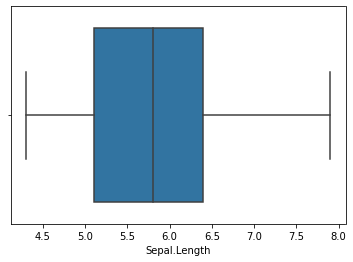

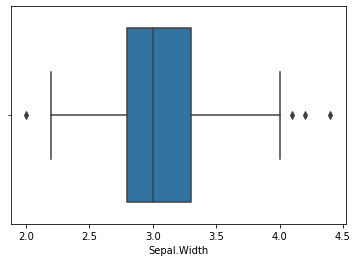

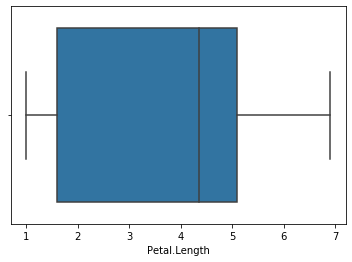

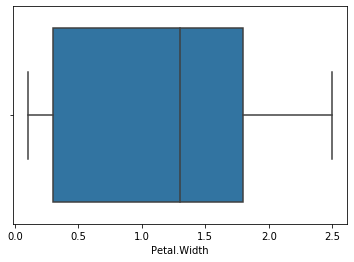

In [9]:
#Checking outliers through visuals
for col in df.columns:
    if df[col].dtypes != "object":
        sb.boxplot(df[col])
        plt.show()

As Sepal Width has few outlier, but as the decision tree is not affected by outliers and outliers are less, we are good to 
proceed

# Exploratory Data Analysis

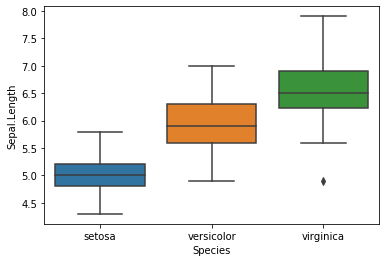

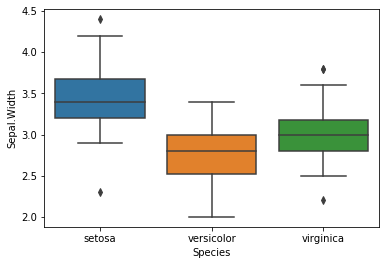

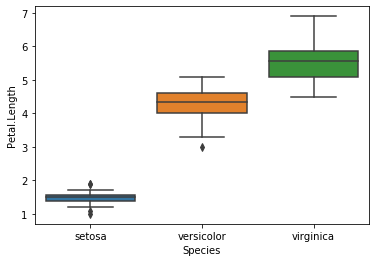

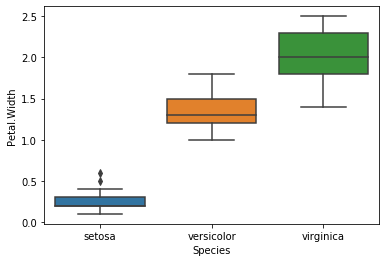

In [11]:
for col in df.columns:
    if df[col].dtypes != "object":
        sb.boxplot(df['Species'],df[col])     #Hence the features with Species has linear realtionship
        plt.show()

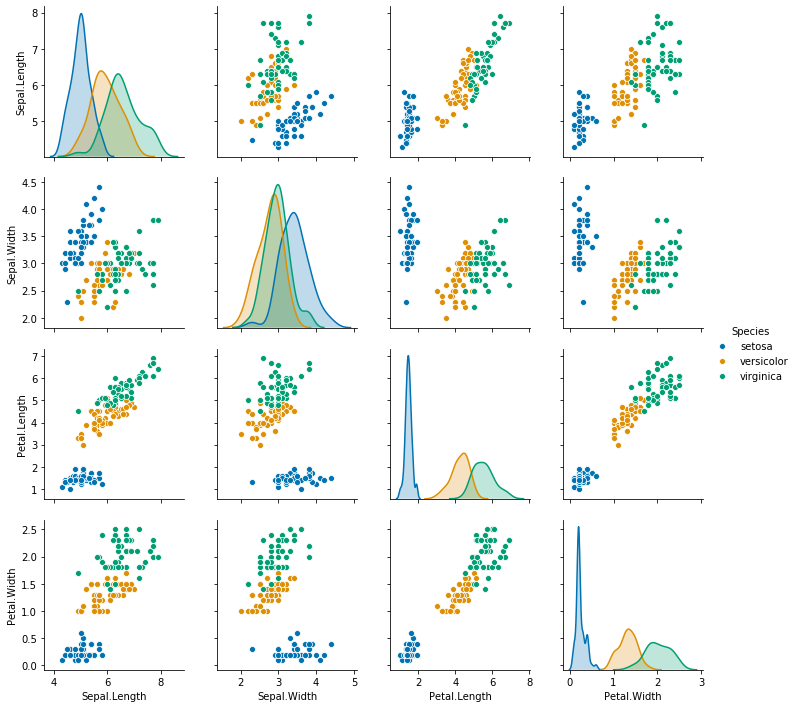

In [12]:
sb.pairplot(data=df,hue="Species",palette="colorblind")

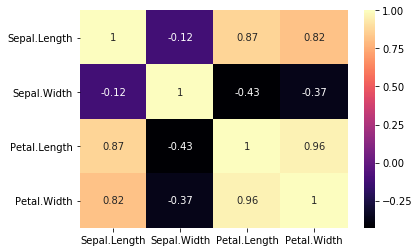

In [14]:
sb.heatmap(df.corr(),annot=True,cmap="magma")

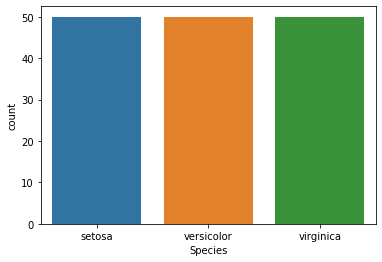

In [16]:
sb.countplot(df.Species)  #Data is equally present for all categories

# Model Preparation

In [4]:
#Model Preparation
X = df.drop(labels=['Species'],axis=1)
Y = df[["Species"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=100)

In [5]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy",random_state=100)
model = dtc.fit(xtrain,ytrain)
predicted = model.predict(xtest)

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy is:",accuracy_score(ytest,predicted))

Accuracy is: 0.9666666666666667


In [7]:
xtest['Expected_OP']=ytest
xtest['Achieved_OP']=predicted
xtest

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Expected_OP,Achieved_OP
128,6.4,2.8,5.6,2.1,virginica,virginica
11,4.8,3.4,1.6,0.2,setosa,setosa
118,7.7,2.6,6.9,2.3,virginica,virginica
15,5.7,4.4,1.5,0.4,setosa,setosa
123,6.3,2.7,4.9,1.8,virginica,virginica
135,7.7,3.0,6.1,2.3,virginica,virginica
32,5.2,4.1,1.5,0.1,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
116,6.5,3.0,5.5,1.8,virginica,virginica
45,4.8,3.0,1.4,0.3,setosa,setosa


In [8]:
from sklearn.tree import export_graphviz
export_graphviz(dtc,out_file="/Users/Manan/dot_data1.dot")
import pydotplus as pdp
graph = pdp.graph_from_dot_file("/Users/Manan/dot_data1.dot")
from IPython.display import Image
#Image(graph.create_jpg())

# Model Evaluation 

In [9]:
from sklearn.metrics import classification_report
print('Classification Report\n')
print(classification_report(ytest,predicted))

Classification Report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.83      0.91         6
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



# Conclusion

Got 97% accuracy with Decision tree classifier to predict the species of iris flower.